In [107]:
import numpy as np
import matplotlib.pyplot as plt

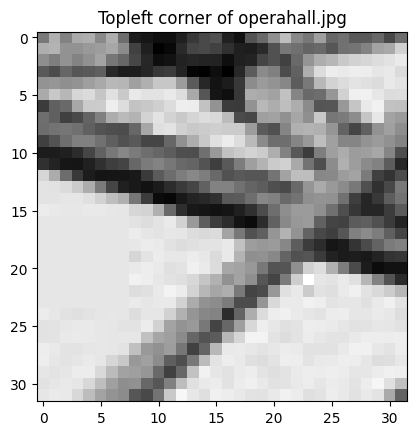

In [108]:
f = np.array(plt.imread('operahall.jpg'), dtype=float)
plt.title("Topleft corner of operahall.jpg")
plt.imshow(f[:32,:32],cmap='gray')

## part (a)

The topleft corner, which is the DC value, is the brightest. Simply through arithmetic, we have that

$$F_{k,l} = \frac{1}{NM} \sum_{n=0}^{N-1} \sum_{j=0}^{M-1} f_{n,j} W_N^{-nk}W_M^{-jl}$$

which when $k,l=0$ gives

$$F_{0,0} = \frac{1}{NM} \sum_{n=0}^{N-1} \sum_{j=0}^{M-1} f_{n,j}$$

which is signifcant as the average of all every $f_{n,k}$, or in this case the average "brightness" of every pixel in the image. 

(132857+0j)


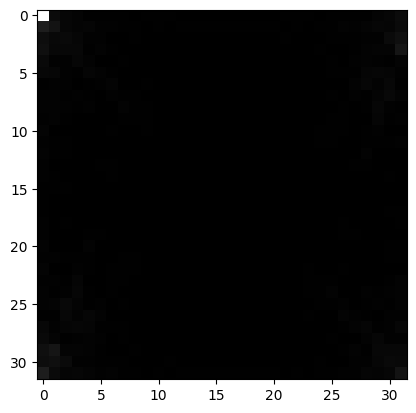

In [109]:
def magn(z):
    return np.sqrt(np.real(z)**2 + np.imag(z)**2)

F = np.fft.fft2(f[:32,:32])
print(F[0,0])
plt.imshow(magn(F),cmap='gray')

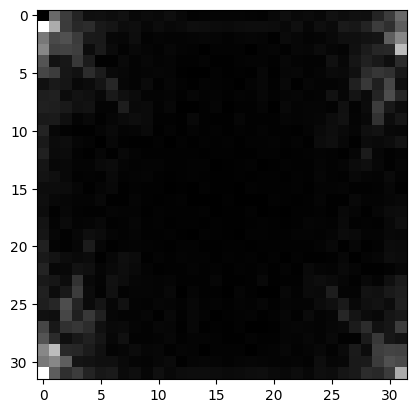

In [110]:
F[0,0] = 0
plt.imshow(magn(F),cmap='gray')

## part (b)

In [111]:
def Compress(X, tol):
    """
    Returns [Y, drop]
    """
    drop = 0
    Y = X.copy() # do not want to modify X itself
    r, c = Y.shape

    assert(r % 32 == 0 and c % 32 == 0)
    og = np.count_nonzero(Y)

    #Y[0,0] = 0

    for i in range(0, r, 32):
        for j in range(0, c, 32):
            subblock = np.fft.fft2(Y[i:i+32, j:j+32])
            max_in_sb = np.max(subblock) * tol
            # Drop values below max * tolerance
            
            for k in range(32):
                for l in range(32):
                    if 0 < magn(subblock[k,l]) <= max_in_sb:
                        drop += 1
                        subblock[k,l] = 0
            # Convert to ifft(2) and drop imaginary values
            local_y = np.fft.ifft2(subblock)
            local_y = local_y.real
            Y[i:i+32, j:j+32] = local_y

    #print(drop)
    drop /= og
    return Y, drop


## part (c)

See below for the four compressed images, with tolerances leading to drop ratios of $0.5, 0.8, 0.92, 0.97$ in that order. The tolerances are $0.0011, 0.0043, 0.011, 0.031$.


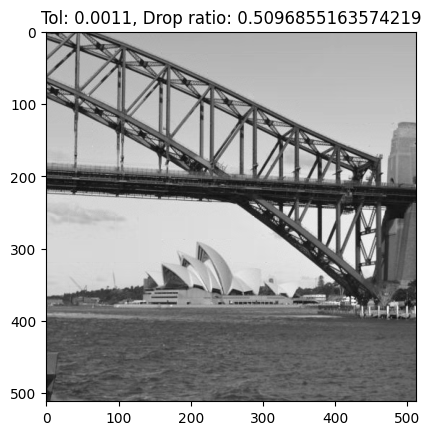

In [118]:
# tol = 0.0011 -> drop ratio = 0.5
high_compressed, drop_ratio = Compress(f, 0.0011)
plt.title(f"Tol: {0.0011}, Drop ratio: {drop_ratio}")
plt.imshow(high_compressed, cmap='grey')

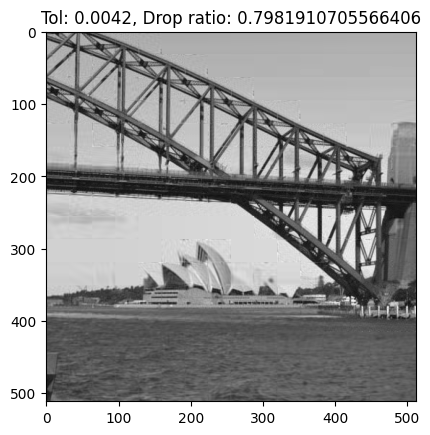

In [113]:
# tol = 0.0042 -> drop ratio = 0.8 (this is the closest for a tol w 2 sigdigs)
compressed, drop_ratio = Compress(f, 0.0042)
plt.title(f"Tol: {0.0042}, Drop ratio: {drop_ratio}")
plt.imshow(compressed, cmap='grey')

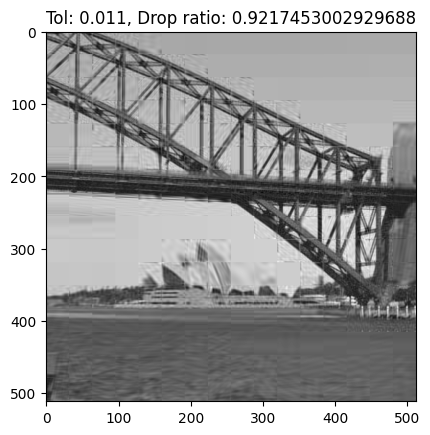

In [114]:
# tol = 0.011 -> drop ratio = 0.92
compressed, drop_ratio = Compress(f, 0.011)
plt.title(f"Tol: {0.011}, Drop ratio: {drop_ratio}")
plt.imshow(compressed, cmap='grey')

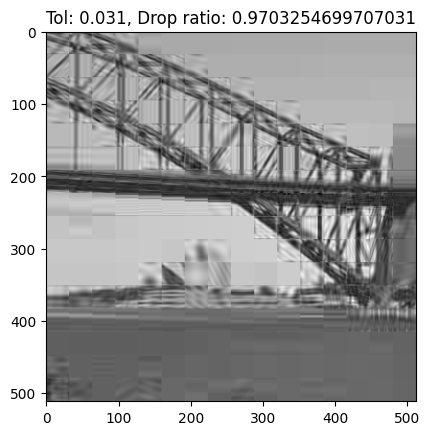

In [115]:
# tol = 0.031 -> drop ratio = 0.97
compressed, drop_ratio = Compress(f, 0.031)
plt.title(f"Tol: {0.031}, Drop ratio: {drop_ratio}")
plt.imshow(compressed, cmap='grey')

Finally, we show the error between the highest quality picture and the original image.

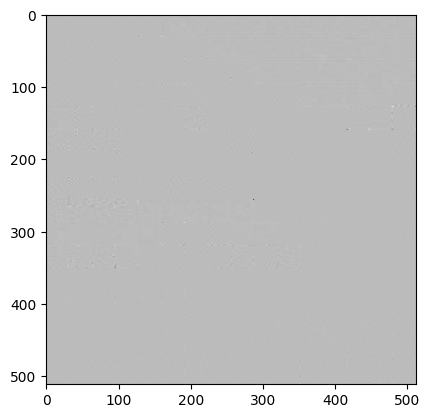

In [116]:
plt.imshow(f - high_compressed, cmap="grey")